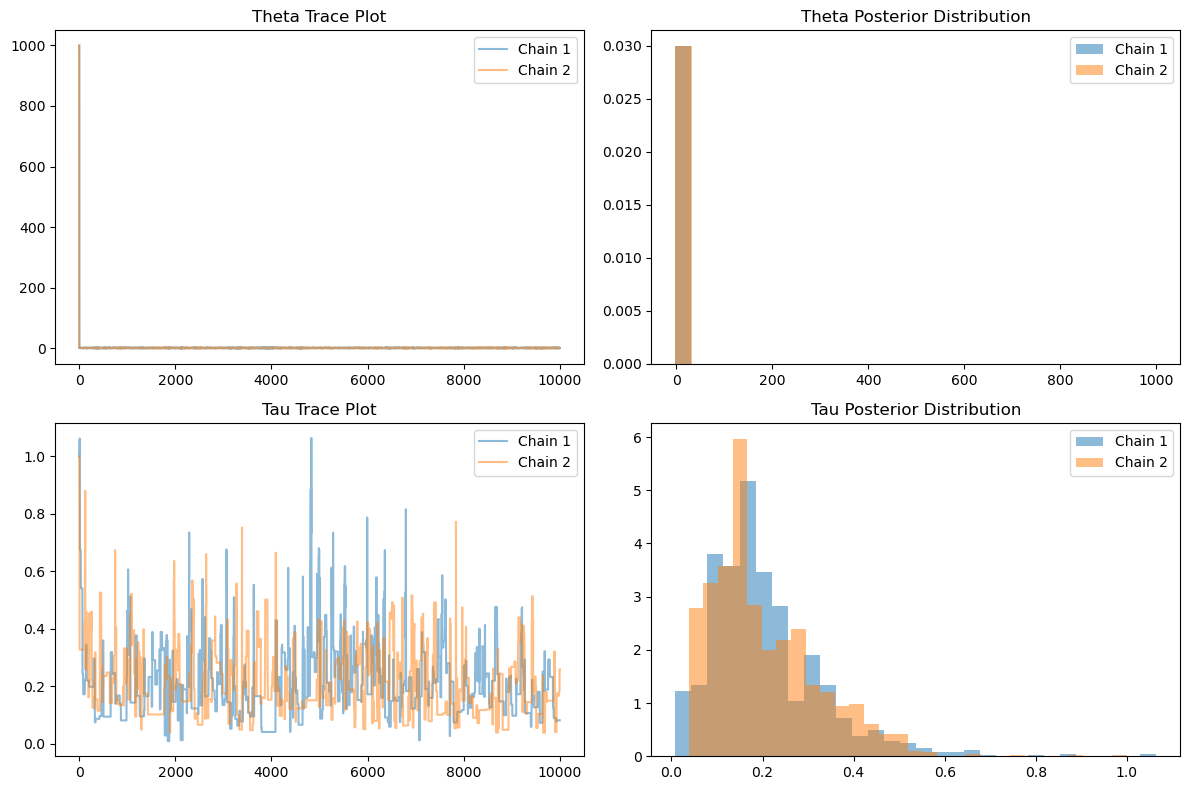

In [1]:
# Q1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
n = 30  # Sample size
m = 0   # True mean
s = 1   # True standard deviation
x = stats.norm(loc=m, scale=s).rvs(size=n)  # Simulated data

# Prior hyperparameters
theta0 = 0    # Prior mean for theta
tau0_sq = 1   # Prior variance for theta
alpha = 2     # Shape parameter for tau
lambda_ = 1   # Rate parameter for tau

# Metropolis within Gibbs parameters
C, G = 2, 10000  # Chains, Gibbs samples
theta, tau = np.zeros((C, G)), np.zeros((C, G))
theta[:, 0] = 1000  # Initialize theta
tau[:, 0] = 1       # Initialize tau

# Independent proposal distribution for tau
proposal_shape, proposal_rate = alpha, lambda_  # Gamma proposal

# Joint density function (up to proportionality)
def log_joint_density(theta, tau):
    log_prior_theta = -0.5 * (theta - theta0) ** 2 / tau0_sq  # Normal prior
    log_prior_tau = (alpha - 1) * np.log(tau) - lambda_ * tau  # Gamma prior
    log_likelihood = -0.5 * tau * np.sum((x - theta) ** 2)  # Gaussian likelihood
    return log_prior_theta + log_prior_tau + log_likelihood

# Metropolis within Gibbs sampling
for c in range(C):
    for g in range(1, G):
        # Gibbs update for theta
        mean_theta = (tau[c, g-1] * np.sum(x) + theta0 / tau0_sq) / (tau[c, g-1] * n + 1 / tau0_sq)
        var_theta = 1 / (tau[c, g-1] * n + 1 / tau0_sq)
        theta[c, g] = stats.norm.rvs(loc=mean_theta, scale=np.sqrt(var_theta))
        
        # Metropolis-Hastings update for tau
        tau_proposed = stats.gamma.rvs(a=proposal_shape, scale=1/proposal_rate)
        log_acceptance_ratio = log_joint_density(theta[c, g], tau_proposed) - log_joint_density(theta[c, g], tau[c, g-1])
        
        if np.log(stats.uniform.rvs()) < log_acceptance_ratio:
            tau[c, g] = tau_proposed  # Accept proposal
        else:
            tau[c, g] = tau[c, g-1]  # Reject proposal and keep previous tau

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for c in range(C):
    axes[0, 0].plot(theta[c, :], alpha=0.5, label=f'Chain {c+1}')
    axes[1, 0].plot(tau[c, :], alpha=0.5, label=f'Chain {c+1}')
    axes[0, 1].hist(theta[c, :], bins=30, density=True, alpha=0.5, label=f'Chain {c+1}')
    axes[1, 1].hist(tau[c, :], bins=30, density=True, alpha=0.5, label=f'Chain {c+1}')

axes[0, 0].set_title("Theta Trace Plot")
axes[1, 0].set_title("Tau Trace Plot")
axes[0, 1].set_title("Theta Posterior Distribution")
axes[1, 1].set_title("Tau Posterior Distribution")
for ax in axes.flatten(): ax.legend()
plt.tight_layout()
plt.show()

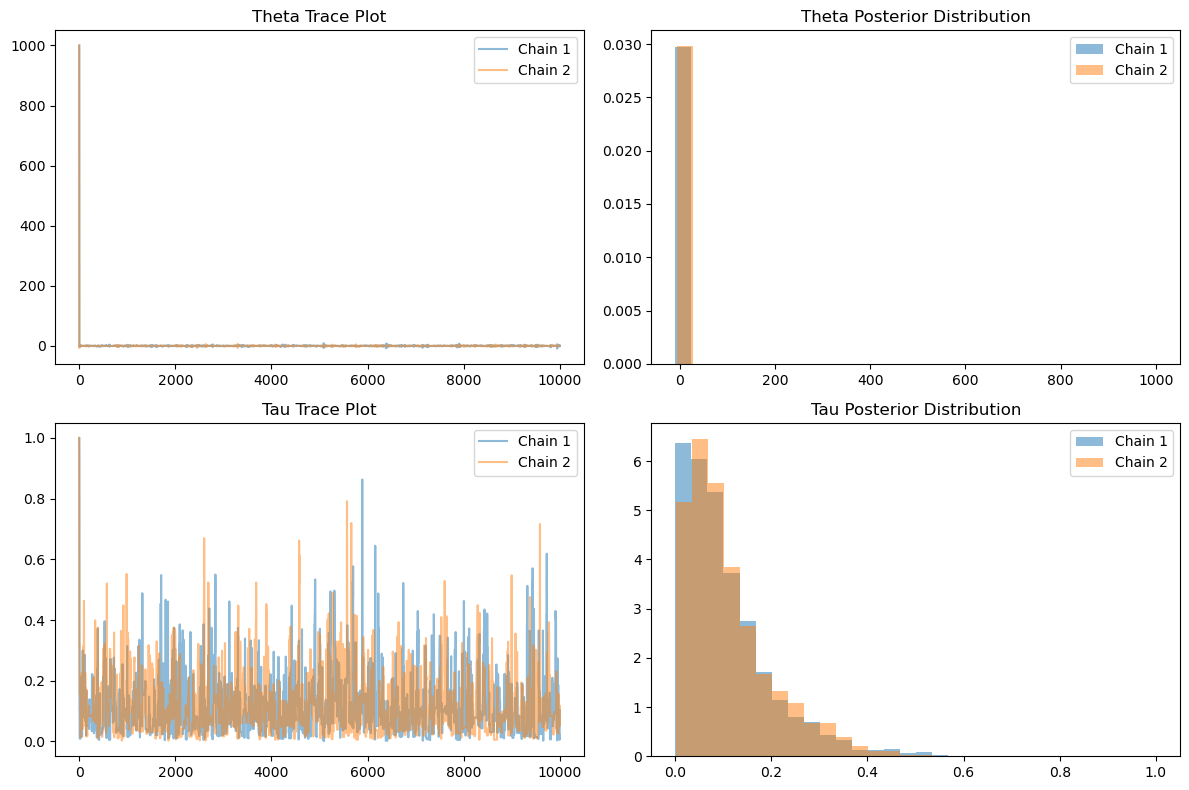

In [2]:
# Q2
# Set parameters
n = 30  # Sample size
m = 0   # True mean
s = 1   # True standard deviation
x = stats.norm(loc=m, scale=s).rvs(size=n)  # Simulated data

# Prior hyperparameters
theta0 = 0    # Prior mean for theta
tau0_sq = 1   # Prior variance for theta
alpha = 2     # Shape parameter for tau
lambda_ = 1   # Rate parameter for tau

# Metropolis within Gibbs parameters
C, G = 2, 10000  # Chains, Gibbs samples
theta, tau = np.zeros((C, G)), np.zeros((C, G))
theta[:, 0] = 1000  # Initialize theta
tau[:, 0] = 1       # Initialize tau

# Non-Normal prior for theta (e.g., Uniform prior)
def log_prior_theta(theta):
    return np.where((-10 <= theta) & (theta <= 10), 0, -np.inf)  # Uniform prior on [-10,10]

# Joint density function (up to proportionality)
def log_joint_density(theta, tau):
    log_prior_tau = (alpha - 1) * np.log(tau) - lambda_ * tau  # Gamma prior
    log_likelihood = -0.5 * tau * np.sum((x - theta) ** 2)  # Gaussian likelihood
    return log_prior_theta(theta) + log_prior_tau + log_likelihood

# Metropolis within Gibbs sampling
for c in range(C):
    for g in range(1, G):
        # Metropolis-Hastings update for theta with non-normal prior
        theta_proposed = stats.uniform.rvs(-10, 20)  # Sample from Uniform prior
        log_acceptance_ratio = log_joint_density(theta_proposed, tau[c, g-1]) - log_joint_density(theta[c, g-1], tau[c, g-1])
        
        if np.log(stats.uniform.rvs()) < log_acceptance_ratio:
            theta[c, g] = theta_proposed  # Accept proposal
        else:
            theta[c, g] = theta[c, g-1]  # Reject proposal
        
        # Metropolis-Hastings update for tau with dependent proposal
        tau_t_minus_1 = tau[c, g-1]
        proposal_dist = stats.truncnorm(a=-tau_t_minus_1/s, b=np.inf, loc=tau_t_minus_1, scale=s)
        tau_proposed = proposal_dist.rvs()
        log_acceptance_ratio = log_joint_density(theta[c, g], tau_proposed) - log_joint_density(theta[c, g], tau[c, g-1])
        
        if np.log(stats.uniform.rvs()) < log_acceptance_ratio:
            tau[c, g] = tau_proposed  # Accept proposal
        else:
            tau[c, g] = tau[c, g-1]  # Reject proposal

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for c in range(C):
    axes[0, 0].plot(theta[c, :], alpha=0.5, label=f'Chain {c+1}')
    axes[1, 0].plot(tau[c, :], alpha=0.5, label=f'Chain {c+1}')
    axes[0, 1].hist(theta[c, :], bins=30, density=True, alpha=0.5, label=f'Chain {c+1}')
    axes[1, 1].hist(tau[c, :], bins=30, density=True, alpha=0.5, label=f'Chain {c+1}')

axes[0, 0].set_title("Theta Trace Plot")
axes[1, 0].set_title("Tau Trace Plot")
axes[0, 1].set_title("Theta Posterior Distribution")
axes[1, 1].set_title("Tau Posterior Distribution")
for ax in axes.flatten(): ax.legend()
plt.tight_layout()
plt.show()

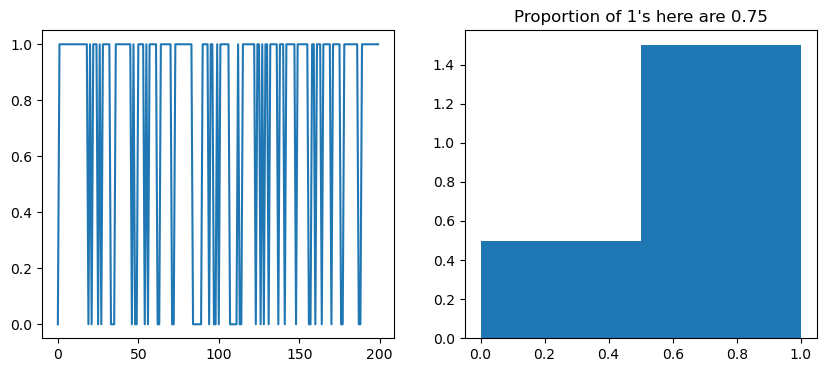

In [3]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A sequentially
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
K = np.array([[.5,.25],[.5,.75]]) 
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])
    
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(s_t)
ax[1].hist(s_t, bins=2, density=True)
ax[1].set_title("Proportion of 1's here are "+str(s_t.mean()));

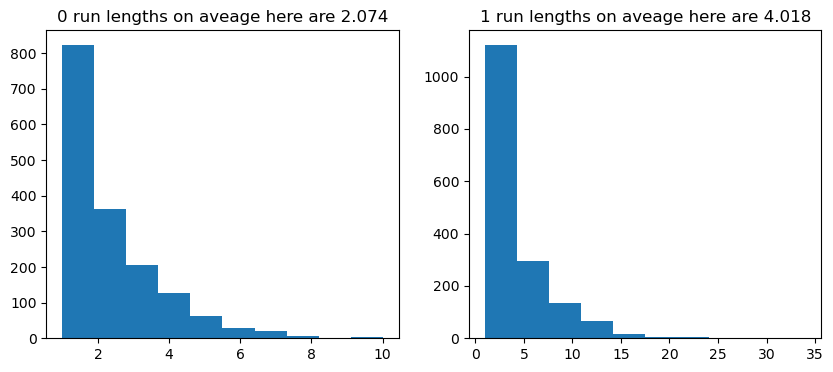

In [4]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by K 
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
T = 10000
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])
    
state0_run_length = []
state1_run_length = []
run_length = 1
for t in range(1,T):
    if s_t[t]==s_t[t-1]:
        run_length += 1
    else:
        if s_t[t-1] == 0:
            state0_run_length += [run_length]
        else:
            state1_run_length += [run_length]        
        run_length = 1
        
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(state0_run_length)
ax[0].set_title("0 run lengths on aveage here are "+str(np.mean(state0_run_length).round(3)))
ax[1].hist(state1_run_length)
ax[1].set_title("1 run lengths on aveage here are "+str(np.mean(state1_run_length).round(3)));